# Introduction To Convolutional Neaural Networks

We will be working with `Fashion Mnist` and `CIFAR-10` Dataset. Both are part of Tensorflow Inbuilt dataset.

In [ ]:
# Import the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model, Input
from tensorflow.keras.optimizers import Adam

##1. Getting the data

In [ ]:
# Import the dataset from the tensorflow datasets
from tensorflow.keras.datasets import fashion_mnist, cifar10

fashion_mnist_data = fashion_mnist.load_data()
cifar_10_data = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Splitting the data into Train and Test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist_data

In [ ]:
# Checking the shape of train and test data
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Let's create the labels class as well for the data
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

##2. Resize the Images

In [ ]:
##2. Resizing the images to be fed into the networks
X_train = X_train/255.
X_test = X_test/255.

##3. Visualizing some random images

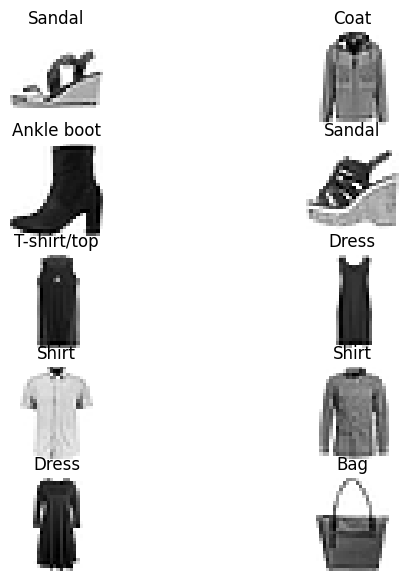

In [ ]:
# Let's view some random images
plt.figure(figsize = (7,7))
for i in range(10):
  random_num = random.choice(range(len(X_train)))
  ax = plt.subplot(5, 2, i+1)
  plt.imshow(X_train[random_num], cmap = plt.cm.binary)
  plt.title(class_names[y_train[random_num]])
  plt.axis(False)

In [ ]:
# Adding extra dimension at the end of data since we are dealing with now three dimensional data
X_train = np.expand_dims(X_train, axis = -1)
y_train = np.expand_dims(y_train, axis = -1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

##4. Build the model

We are building the model using the Functional API.

In [ ]:
# Create the model
input = Input(shape = X_train[0].shape, name = 'input')
x = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), activation = 'relu')(input)
x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3,3), strides = (2,2), activation = 'relu')(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(10, activation = 'relu')(x)
output = Dense(10, activation = 'softmax')(x)

# Assign a model
model = Model(input, output)

##5. Compile the model

In [ ]:
# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

##6. Fit the model

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test), verbose = True)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5896 - accuracy: 0.7874 - val_loss: 0.4778 - val_accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3787 - accuracy: 0.8596 - val_loss: 0.3704 - val_accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3227 - accuracy: 0.8798 - val_loss: 0.3342 - val_accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2844 - accuracy: 0.8928 - val_loss: 0.3439 - val_accuracy: 0.8725
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2555 - accuracy: 0.9036 - val_loss: 0.3100 - val_accuracy: 0.8862


In [ ]:
##7. Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3100 - accuracy: 0.8862


[0.3099789321422577, 0.8862000107765198]

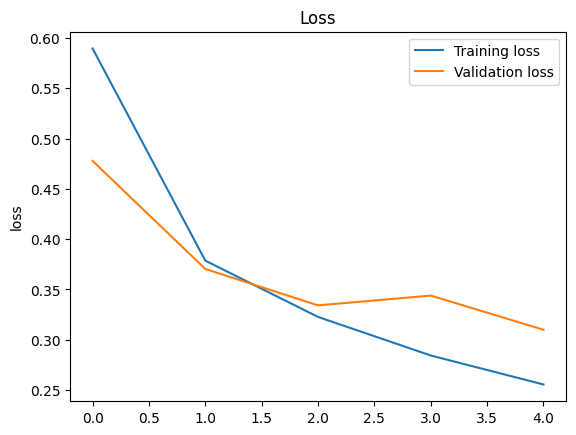

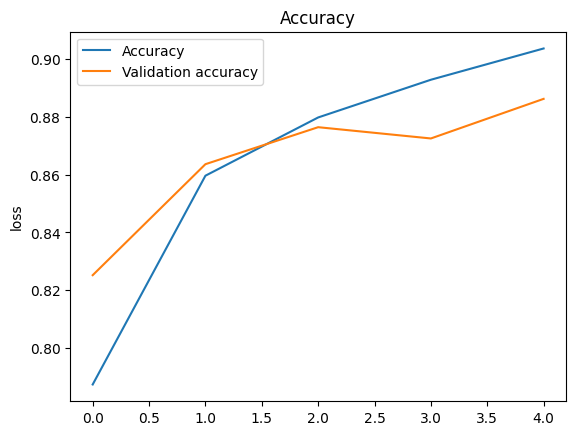

In [ ]:
# Plotting the loss and accuracy curves for both Train and Validation sets
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss')
plt.ylabel('loss')
plt.legend()
plt.figure()
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy')
plt.ylabel('loss')
plt.legend()

In [ ]:
# Plot random images with their predicted and actual labels
def pred_and_plot(model, images, labels, classes):
  random_num = random.choice(range(len(images)))
  target_image = images[random_num]
  predicted_prob = model.predict(target_image.reshape(1,28,28,1))
  predicted_label = classes[predicted_prob.argmax()]
  true_label = classes[labels[random_num]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Put the labels
  if true_label == predicted_label:
    color = 'green'

  else:
    color = 'red'

  plt.title("Predicted Label: {}\nTrue Label: {}\nMatch percent: {:2.0f}%".format(predicted_label,
                                                                                  true_label,
                                                                                  100*tf.reduce_max(predicted_prob)),
            color = color)

1/1 [==============================] - 0s 108ms/step


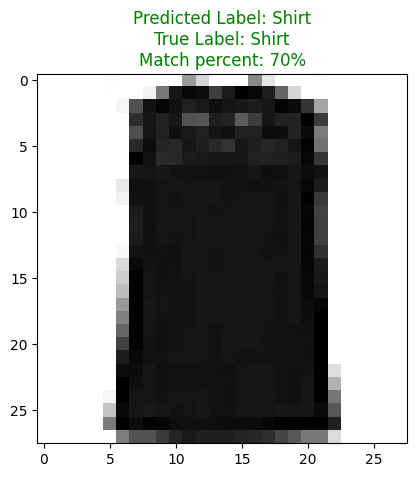

In [ ]:
# let's try our helper function to plot and pred
pred_and_plot(model = model,
              images = X_test,
              labels = y_test,
              classes = class_names)

# Working with `cifar10` Dataset

In [ ]:
# Load the data
(train_data, train_labels) , (test_data, test_labels) = cifar_10_data

In [ ]:
# Resize the images
train_data = train_data/255.
test_data = test_data/255.
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

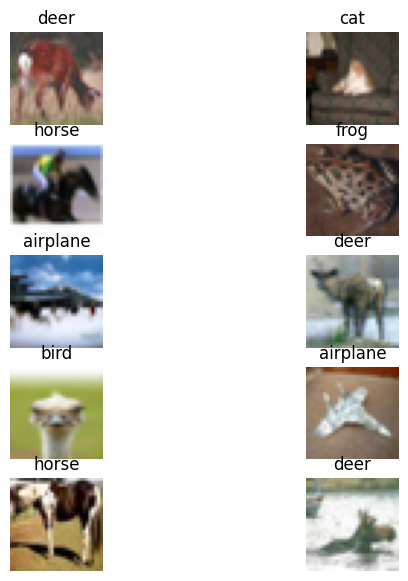

In [ ]:
# Let's view some random images
plt.figure(figsize = (7,7))
for i in range(10):
  random_num = random.choice(range(len(train_data)))
  ax = plt.subplot(5, 2, i+1)
  plt.imshow(train_data[random_num])
  plt.title(cifar10_classes[train_labels[random_num]])
  plt.axis(False)

In [ ]:
# Create the model
input = Input(shape = train_data[0].shape, name = 'input')
x = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), activation = 'relu')(input)
x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3,3), strides = (2,2), activation = 'relu')(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(10, activation = 'relu')(x)
output = Dense(10, activation = 'softmax')(x)

# Assign a model
model_1 = Model(input, output)

In [ ]:
# Compile the model
model_1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data, train_labels, epochs = 5, validation_data = (test_data, test_labels), verbose = True)

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9391 - accuracy: 0.2570 - val_loss: 1.5770 - val_accuracy: 0.4298
Epoch 2/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4498 - accuracy: 0.4685 - val_loss: 1.4260 - val_accuracy: 0.4829
Epoch 3/5
1563/1563 [==============================] - 16s 11ms/step - loss: 1.2887 - accuracy: 0.5323 - val_loss: 1.2962 - val_accuracy: 0.5322
Epoch 4/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1806 - accuracy: 0.5753 - val_loss: 1.2480 - val_accuracy: 0.5522
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0908 - accuracy: 0.6069 - val_loss: 1.1569 - val_accuracy: 0.5921


In [ ]:
# Plot random images with their predicted and actual labels
def plot_and_pred(model, images, labels, classes):
  random_num = random.choice(range(len(images)))
  target_image = images[random_num]
  predicted_prob = model.predict(target_image.reshape(1,32,32,3))
  predicted_label = classes[predicted_prob.argmax()]
  true_label = classes[labels[random_num]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Put the labels
  if true_label == predicted_label:
    color = 'green'

  else:
    color = 'red'

  plt.title("Predicted Label: {}\nTrue Label: {}\nMatch percent: {:2.0f}%".format(predicted_label,
                                                                                  true_label,
                                                                                  100*tf.reduce_max(predicted_prob)),
            color = color)

1/1 [==============================] - 0s 15ms/step


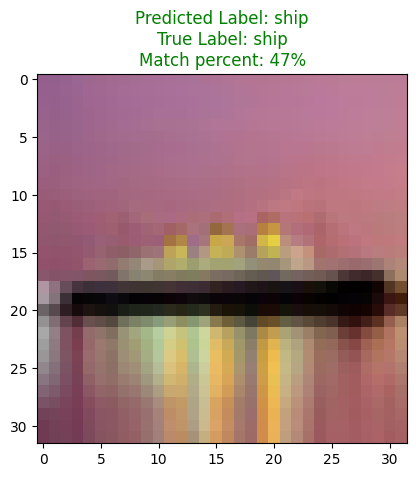

In [ ]:
plot_and_pred(model_1, train_data, train_labels, cifar10_classes)

# Improving the `CIFAR10` dataset

## Performing Data Augmentations

In [ ]:
# Use data augmentations by using the Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.3,
                                   horizontal_flip = True)

In [ ]:
# Loading the data using the tf.data API
train_data_augmented = train_datagen.flow(train_data,
                                          train_labels,
                                          batch_size = 32,
                                          shuffle = True)

In [ ]:
train_data.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, MaxPool2D

In [ ]:
# Now build the model, we will be replicating VGG model to a some extent
# set random_seed
tf.random.set_seed(23)

# build the model
i = Input(shape = (32,32,3))
y = Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(i)
y = BatchNormalization()(y)
y = Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(y)
y = BatchNormalization()(y)
y = MaxPool2D(pool_size = (2,2), strides = 2)(y)

y = Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same')(y)
y = BatchNormalization()(y)
y = Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same')(y)
y = BatchNormalization()(y)
y = MaxPool2D(pool_size = (2,2))(y)

y = Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')(y)
y = BatchNormalization()(y)
y = Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')(y)
y = BatchNormalization()(y)
y = MaxPool2D(pool_size = (2,2))(y)

y = Flatten()(y)
y = Dense(100, activation = 'relu')(y)
y = Dense(10, activation = 'relu')(y)
out = Dense(10, activation = 'softmax')(y)

model_2 = Model(i, out)

In [ ]:
# Compile the model
model_2.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
len(train_data_augmented)

1563

In [ ]:
hist_2 = model_2.fit_generator(train_data_augmented, epochs = 5, validation_data = (test_data, test_labels), steps_per_epoch = len(train_data_augmented))

Epoch 1/5


<ipython-input-77-1400c52b58ab>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_2 = model_2.fit_generator(train_data_augmented, epochs = 5, validation_data = (test_data, test_labels), steps_per_epoch = len(train_data_augmented))


1563/1563 [==============================] - 276s 177ms/step - loss: 1.5216 - accuracy: 0.4189 - val_loss: 1.2485 - val_accuracy: 0.5484
Epoch 2/5
1563/1563 [==============================] - 267s 171ms/step - loss: 1.0762 - accuracy: 0.6155 - val_loss: 0.9971 - val_accuracy: 0.6520
Epoch 3/5
1563/1563 [==============================] - 275s 176ms/step - loss: 0.8811 - accuracy: 0.6958 - val_loss: 0.8285 - val_accuracy: 0.7164
Epoch 4/5
1563/1563 [==============================] - 268s 171ms/step - loss: 0.7570 - accuracy: 0.7407 - val_loss: 0.8120 - val_accuracy: 0.7277
Epoch 5/5
1563/1563 [==============================] - 274s 176ms/step - loss: 0.6739 - accuracy: 0.7713 - val_loss: 0.8792 - val_accuracy: 0.7134


In [ ]:
model_2.evaluate(test_data, test_labels)

313/313 [==============================] - 13s 41ms/step - loss: 0.9254 - accuracy: 0.7101


[0.9254255890846252, 0.710099995136261]

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=230
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)